Fit QuantifierRecommender and save the resulting Meta-Table

In [1]:
# from quantifier_recommender import QuantifierRecommender

# recommender = QuantifierRecommender(supervised=True)
# recommender.fit(datasets_path="./datasets/", train_data_path="./data/train_data/", test_data_path="./data/test_data/")
# recommender.save_meta_table("./recommender_data/meta_table.h5")

Evaluate QuantifierRecommender with Leave-One-Out

In [1]:
from quantifier_recommender import QuantifierRecommender

recommender = QuantifierRecommender(supervised=True)
recommender.load_fit_meta_table("./recommender_data/meta_table.h5")
# recommender_eval, quantifiers_eval = recommender.leave_one_out_evaluation("./plot_data/recommender_evaluation_table.csv",
#                                                                           "./plot_data/quantifiers_evaluation_table.csv")

In [11]:
# recommender.evaluation_table.loc['CC', 'AedesQuinx']
t = recommender.get_not_agg()
t.loc[(t["quantifier"] == "CC") & (t["dataset"] == "AedesSex")]

,quantifier,dataset,sample_size,real_prev,pred_prev,abs_error,run_time
1,CC,AedesSex,100,0.00,0.01,0.019,0.000005
12,CC,AedesSex,100,0.05,0.07,0.005,0.000005
23,CC,AedesSex,100,0.11,0.11,0.015,0.000005
34,CC,AedesSex,100,0.16,0.18,0.016,0.000005
45,CC,AedesSex,100,0.21,0.21,0.010,0.000005
56,CC,AedesSex,100,0.26,0.26,0.008,0.000005
67,CC,AedesSex,100,0.32,0.30,0.009,0.000005
78,CC,AedesSex,100,0.37,0.36,0.008,0.000005
89,CC,AedesSex,100,0.42,0.44,0.013,0.000005
100,CC,AedesSex,100,0.47,0.47,0.010,0.000005


In [ ]:
t.loc[(t["quantifier"] == "DyS") & (t["dataset"] == "AedesSex")]

Evaluate the KQuantifier for each dataset using APP

In [3]:
from k_quantifier import KQuantifier

k_quantifier = KQuantifier()
k_quantifier_eval = k_quantifier.evaluation(recommender_eval, quantifiers_eval, "./plot_data/k_quantifier_evaluation_table.csv")

> c:\guizo\quantifier_recommender\k_quantifier.py(100)evaluation()
     98                         sample_size = row["sample_size"].values[0]
     99                     pdb.set_trace()
--> 100                     k_quantifier_row = {"quantifier": "Top-" + str(k),
    101                                         "dataset": dataset,
    102                                         "sample_size": sample_size,

[np.float64(0.03)]
[np.float64(0.03)]
[np.float64(0.03)]
[np.float64(0.03)]
> c:\guizo\quantifier_recommender\k_quantifier.py(100)evaluation()
     98                         sample_size = row["sample_size"].values[0]
     99                     pdb.set_trace()
--> 100                     k_quantifier_row = {"quantifier": "Top-" + str(k),
    101                                         "dataset": dataset,
    102                                         "sample_size": sample_size,

[np.float64(0.05)]
> c:\guizo\quantifier_recommender\k_quantifier.py(100)evaluation()
     98           

Join the Quantifiers Evaluation Table with the KQuantifier Evaluation Table

In [4]:
import pandas as pd

complete_evaluation_table = pd.concat([quantifiers_eval, k_quantifier_eval], axis=0)
complete_evaluation_table.to_csv("./plot_data/complete_evaluation_table.csv", index=False)

In [9]:
k_eval = pd.read_csv("./plot_data/k_quantifier_evaluation_table.csv")
k_eval = k_eval[k_eval['dataset'] == 'AedesQuinx']
k_eval = k_eval[k_eval['real_prev'] == 0.11]
k_eval

,quantifier,dataset,sample_size,real_prev,pred_prev,abs_error,run_time
2,Top-1,AedesQuinx,100,0.11,0.08,0.03,0.000125
402,Top-10,AedesQuinx,100,0.11,0.08,0.03,1.670396
802,Top-11,AedesQuinx,100,0.11,0.08,0.03,1.670401
1202,Top-2,AedesQuinx,100,0.11,0.08,0.03,0.222243
1602,Top-3,AedesQuinx,100,0.11,0.08,0.03,1.588965
2002,Top-4,AedesQuinx,100,0.11,0.08,0.03,1.589156
2402,Top-5,AedesQuinx,100,0.11,0.08,0.03,1.638903
2802,Top-6,AedesQuinx,100,0.11,0.08,0.03,1.639265
3202,Top-7,AedesQuinx,100,0.11,0.08,0.03,1.641872
3602,Top-8,AedesQuinx,100,0.11,0.08,0.03,1.667169


In [4]:
import pandas as pd
import numpy as np
import pdb

k_quantifier_eval = pd.DataFrame(columns=["quantifier", "dataset", "sample_size",
                                          "real_prev", "pred_prev", "abs_error",
                                          "run_time"])
for dataset in quantifiers_eval["dataset"].unique().tolist():
    ranking = recommender_eval.loc[dataset]["predicted_ranking"]
    rows_by_dataset = quantifiers_eval[quantifiers_eval["dataset"] == dataset]
    alphas = rows_by_dataset["real_prev"].unique().tolist()

    predicted_prev_list = []
    for k in range(1, 12):
        for alph in alphas:
            run_time_sum = 0
            sample_size = 0
            for i in range(0, k):
                row = rows_by_dataset[(rows_by_dataset["real_prev"] == alph) & (rows_by_dataset["quantifier"] == ranking[i])]
                predicted_prev_list.append(row["pred_prev"].values[0])
                run_time_sum += row["run_time"].values[0]
                sample_size = row["sample_size"].values[0]
            k_quantifier_row = {"quantifier": "Top-" + str(k),
                                "dataset": dataset,
                                "sample_size": sample_size,
                                "real_prev": alph,
                                "pred_prev": np.median(predicted_prev_list),
                                "abs_error": np.abs(np.median(predicted_prev_list) - alph),
                                "run_time": run_time_sum}
            k_quantifier_eval.loc[len(k_quantifier_eval)] = k_quantifier_row        
k_quantifier_eval.sort_values(by=['quantifier', 'dataset'], inplace=True)
k_quantifier_eval.reset_index(drop=True, inplace=True)
k_quantifier_eval.to_csv("./plot_data/k_quantifier_evaluation_table.csv", index=False)

In [5]:
k_eval_1 = pd.read_csv("./plot_data/k_quantifier_evaluation_table.csv")
k_eval_2 = pd.read_csv("./plot_data/k_quantifier_evaluation_table2.csv")

comparison = k_eval_1.equals(k_eval_2)
print("Do k_eval_1 and k_eval_2 have the exact same values?", comparison)

Do k_eval_1 and k_eval_2 have the exact same values? True


In [1]:
import os
import numpy as np
import pandas as pd

from quantifier_recommender import QuantifierRecommender

quantifier_recommender = QuantifierRecommender()

# quantifier_recommender.construct_meta_table(datasets_path="./datasets/",
#                                             train_data_path="./data/train_data/",
#                                             test_data_path="./data/test_data/",
#                                             supervised=True)

# quantifier_recommender.evaluation_table.to_csv("./recommender_evaluation_table.csv", index=False)
# quantifier_recommender.meta_features_table.to_csv("./recommender_meta_features_table.csv", index=False)

df = pd.read_csv("./recommender_evaluation_table2.csv")

In [39]:
df = pd.read_csv('./test.csv')

iterables = [df['quantifier'].unique().tolist(), df['dataset'].unique().tolist()]
index = pd.MultiIndex.from_product(iterables, names=["quantifier", "dataset"])

abs_error_list = df["abs_error"].tolist()
run_time_list = df["run_time"].tolist()
new_df = pd.DataFrame({"abs_error": abs_error_list, "run_time": run_time_list}, index=index)
# df.pop('quantifier')
# df.pop('dataset')

# df

new_df.loc['ACC', 'AedesSex']['abs_error']

# X_train = meta_features.values
# y_train = new_df.loc['DyS']['abs_error'].values

# # CC
# fit(X_train, y_train)

# rec_dict = {"CC": rec, "ACC": rec}

# dataset_novo -> extrai meta features -> linha de metafeatures




# y_train
# # # index.get_loc()

np.float64(0.0144999999999999)

In [26]:
import os
import numpy as nps
import pandas as pd
import pdb
from copy import deepcopy
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from quantifier_recommender import QuantifierRecommender

qtf_rec = QuantifierRecommender.load_model("s_qtf_recommender.pkl")
evaluation_table = qtf_rec.evaluation_table

# recommenders = qtf_rec.rec

y_test = None
y_train = None

recommender_evaluation_table = pd.DataFrame(columns=["predicted_error", "true_error"], index=qtf_rec.evaluation_table.index)
for quantifier, recommender in qtf_rec.recommender_dict.items():
    recommender_ = None
    scaler = MinMaxScaler()
    if isinstance(recommender, RandomForestRegressor):
        recommender_ = RandomForestRegressor()

    for dataset in qtf_rec.evaluation_table.index.levels[1]:
        unscaled_X_test = qtf_rec._unscaled_meta_features_table.loc[dataset].values
        y_test = qtf_rec.evaluation_table.loc[quantifier, dataset]['abs_error']

        unscaled_X_train = qtf_rec._unscaled_meta_features_table.drop(index=dataset).values
        y_train = qtf_rec.evaluation_table.loc[quantifier].drop(index=dataset)['abs_error'].values

        scaler.fit(unscaled_X_train)
        X_train = scaler.transform(unscaled_X_train)
        recommender_.fit(X_train, y_train)

        X_test = scaler.fit_transform(np.array(unscaled_X_test).reshape(1, -1))
        predicted_error = recommender_.predict(X_test)[0]

        recommender_evaluation_table.loc[(quantifier, dataset)] = [predicted_error, y_test]

        
        break
    # break
#     for quantifier in self.evaluation_table.index.levels[0].tolist():
#         y_train = self.evaluation_table.loc[quantifier]['abs_error'].values
#         self.recommender_dict[quantifier] = RandomForestRegressor()
#         self.recommender_dict[quantifier].fit(X_train, y_train)
#         print(index)
        # test_data = evaluation_table.loc[index]
        # train_data = evaluation_table.drop(index=index)
        # break



# train_data
# y_train
recommender_evaluation_table
# qtf_rec.evaluation_table.index

predicted_error true_error
quantifier dataset                               
ACC        AedesQuinx          0.01736     0.0465
           AedesSex                NaN        NaN
           anuranCalls             NaN        NaN
CC         AedesQuinx          0.03391      0.092
           AedesSex                NaN        NaN
           anuranCalls             NaN        NaN
DyS        AedesQuinx          0.01114     0.0425
           AedesSex                NaN        NaN
           anuranCalls             NaN        NaN
HDy        AedesQuinx          0.01795     0.0605
           AedesSex                NaN        NaN
           anuranCalls             NaN        NaN
MAX        AedesQuinx          0.01524      0.048
           AedesSex                NaN        NaN
           anuranCalls             NaN        NaN
MS         AedesQuinx          0.01641      0.046
           AedesSex                NaN        NaN
           anuranCalls             NaN        NaN
PACC       AedesQuinx            0.022     0.0795
           AedesSex                NaN        NaN
           anuranCalls             NaN        NaN
PCC        AedesQuinx           0.0365      0.144
           AedesSex                NaN        NaN
           anuranCalls             NaN        NaN
SMM        AedesQuinx          0.01703      0.046
           AedesSex                NaN        NaN
           anuranCalls             NaN        NaN
SORD       AedesQuinx          0.01486      0.042
           AedesSex                NaN        NaN
           anuranCalls             NaN        NaN
X          AedesQuinx         0.018855     0.0475
           AedesSex                NaN        NaN
           anuranCalls             NaN        NaN

In [6]:
qtf_rec.recommender_dict['ACC']

RandomForestRegressor()

In [7]:
from sklearn.ensemble import RandomForestRegressor
isinstance(qtf_rec.recommender_dict['ACC'], RandomForestRegressor)

True

In [53]:
qtf_rec.evaluation_table

abs_error  run_time
quantifier dataset                         
ACC        AedesQuinx      0.0465  0.001329
           AedesSex        0.0145  0.001281
           anuranCalls     0.0200  0.001361
CC         AedesQuinx      0.0920  0.000008
           AedesSex        0.0190  0.000010
           anuranCalls     0.0400  0.000010
DyS        AedesQuinx      0.0425  0.049736
           AedesSex        0.0075  0.048827
           anuranCalls     0.0140  0.048127
HDy        AedesQuinx      0.0605  0.219288
           AedesSex        0.0085  0.217841
           anuranCalls     0.0260  0.208500
MAX        AedesQuinx      0.0480  0.000203
           AedesSex        0.0130  0.000209
           anuranCalls     0.0165  0.000203
MS         AedesQuinx      0.0460  0.030952
           AedesSex        0.0130  0.031222
           anuranCalls     0.0185  0.031122
PACC       AedesQuinx      0.0795  0.004147
           AedesSex        0.0220  0.004062
           anuranCalls     0.0220  0.004088
PCC        AedesQuinx      0.1440  0.002745
           AedesSex        0.0295  0.002721
           anuranCalls     0.0545  0.002634
SMM        AedesQuinx      0.0460  0.000151
           AedesSex        0.0100  0.000149
           anuranCalls     0.0195  0.000115
SORD       AedesQuinx      0.0420  1.379702
           AedesSex        0.0115  1.385671
           anuranCalls     0.0175  0.361445
X          AedesQuinx      0.0475  0.000423
           AedesSex        0.0145  0.000419
           anuranCalls     0.0210  0.000398

In [26]:
y_train = qtf_rec.evaluation_table.loc[quantifier]['abs_error'].values
y_train

array([0.0465, 0.0145, 0.02  ])

In [23]:
qtf_rec.recommender_dict.keys()

dict_keys(['ACC', 'CC', 'DyS', 'HDy', 'MAX', 'MS', 'PACC', 'PCC', 'SMM', 'SORD', 'X'])

In [13]:
import pandas as pd
import numpy as np

old_win_count = 0
win_count = 0
draw_count = 0

old_rec = pd.read_csv("./recommender_data/OLD_recommender_evaluation_table_2.csv")
rec = pd.read_csv("./recommender_data/recommender_evaluation_table_2.csv")

predicted_error = old_rec['predicted_error'].values
true_error = old_rec['true_error'].values
old_rec_error = abs(predicted_error - true_error)

predicted_error = rec['predicted_error'].values
true_error = rec['true_error'].values
rec_error = abs(predicted_error - true_error)

for i in range(len(old_rec_error)):
    if rec_error[i] > old_rec_error[i]:
        win_count += 1
    elif rec_error[i] < old_rec_error[i]:
        old_win_count += 1
    else:
        draw_count += 1


print(win_count)
print(old_win_count)
print(draw_count)

177
43
0


In [1]:
from quantifier_recommender import QuantifierRecommender

qtf_rec = QuantifierRecommender.load_model("s_qtf_recommender.pkl")

qtf_rec.save_meta_table("./recommender_data/meta_features_table.csv", "./recommender_data/evaluation_table.csv")

In [3]:
qtf = QuantifierRecommender()

qtf.load_meta_table("./recommender_data/meta_features_table.csv", "./recommender_data/evaluation_table.csv")

qtf.meta_features_table

,attr_conc.mean,attr_conc.sd,attr_ent.mean,attr_ent.sd,attr_to_inst,best_node.mean,best_node.sd,can_cor.mean,can_cor.sd,cat_to_num,...,tree_imbalance.sd,tree_shape.mean,tree_shape.sd,var.mean,var.sd,var_importance.mean,var_importance.sd,w_lambda,worst_node.mean,worst_node.sd
AedesQuinx,0.0492,0.013558,1.000000,0.000078,0.0,0.000000,0.450229,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.189334
AedesSex,0.0000,0.000000,0.999554,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,...,0.658878,0.435942,0.559867,0.0,0.0,0.0,1.000000,0.0,0.176336,1.000000
anuranCalls,1.0000,1.000000,0.000000,1.000000,1.0,0.227146,1.000000,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,0.0,0.0,1.0,0.442822,0.0,1.000000,0.000000


In [5]:
qtf = QuantifierRecommender()
qtf.load_meta_table_fit("./recommender_data/meta_features_table.csv", "./recommender_data/evaluation_table.csv")

,attr_conc.mean,attr_conc.sd,attr_ent.mean,attr_ent.sd,attr_to_inst,best_node.mean,best_node.sd,can_cor.mean,can_cor.sd,cat_to_num,...,tree_imbalance.sd,tree_shape.mean,tree_shape.sd,var.mean,var.sd,var_importance.mean,var_importance.sd,w_lambda,worst_node.mean,worst_node.sd
AedesQuinx,0.019865,0.016661,4.723763,0.427495,0.001125,0.742375,0.137430,0.0,0.0,0.0,...,0.050013,0.003325,0.009905,0.0,0.0,0.037037,0.072402,0.0,0.572500,0.076364
AedesSex,0.017272,0.015079,4.723431,0.427459,0.001125,0.950167,0.054558,0.0,0.0,0.0,...,0.076568,0.021071,0.035680,0.0,0.0,0.037037,0.169853,0.0,0.596042,0.112341
anuranCalls,0.069978,0.131726,3.980382,0.889031,0.003341,0.789574,0.238623,0.0,0.0,0.0,...,0.090316,0.044033,0.055943,0.0,0.0,0.045455,0.115556,0.0,0.706004,0.067961


C:\Users\coenL\AppData\Local\Temp\ipykernel_4684\1075690537.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(data=sample, x='quantifier', y='error_rank', order = order, palette = palette)


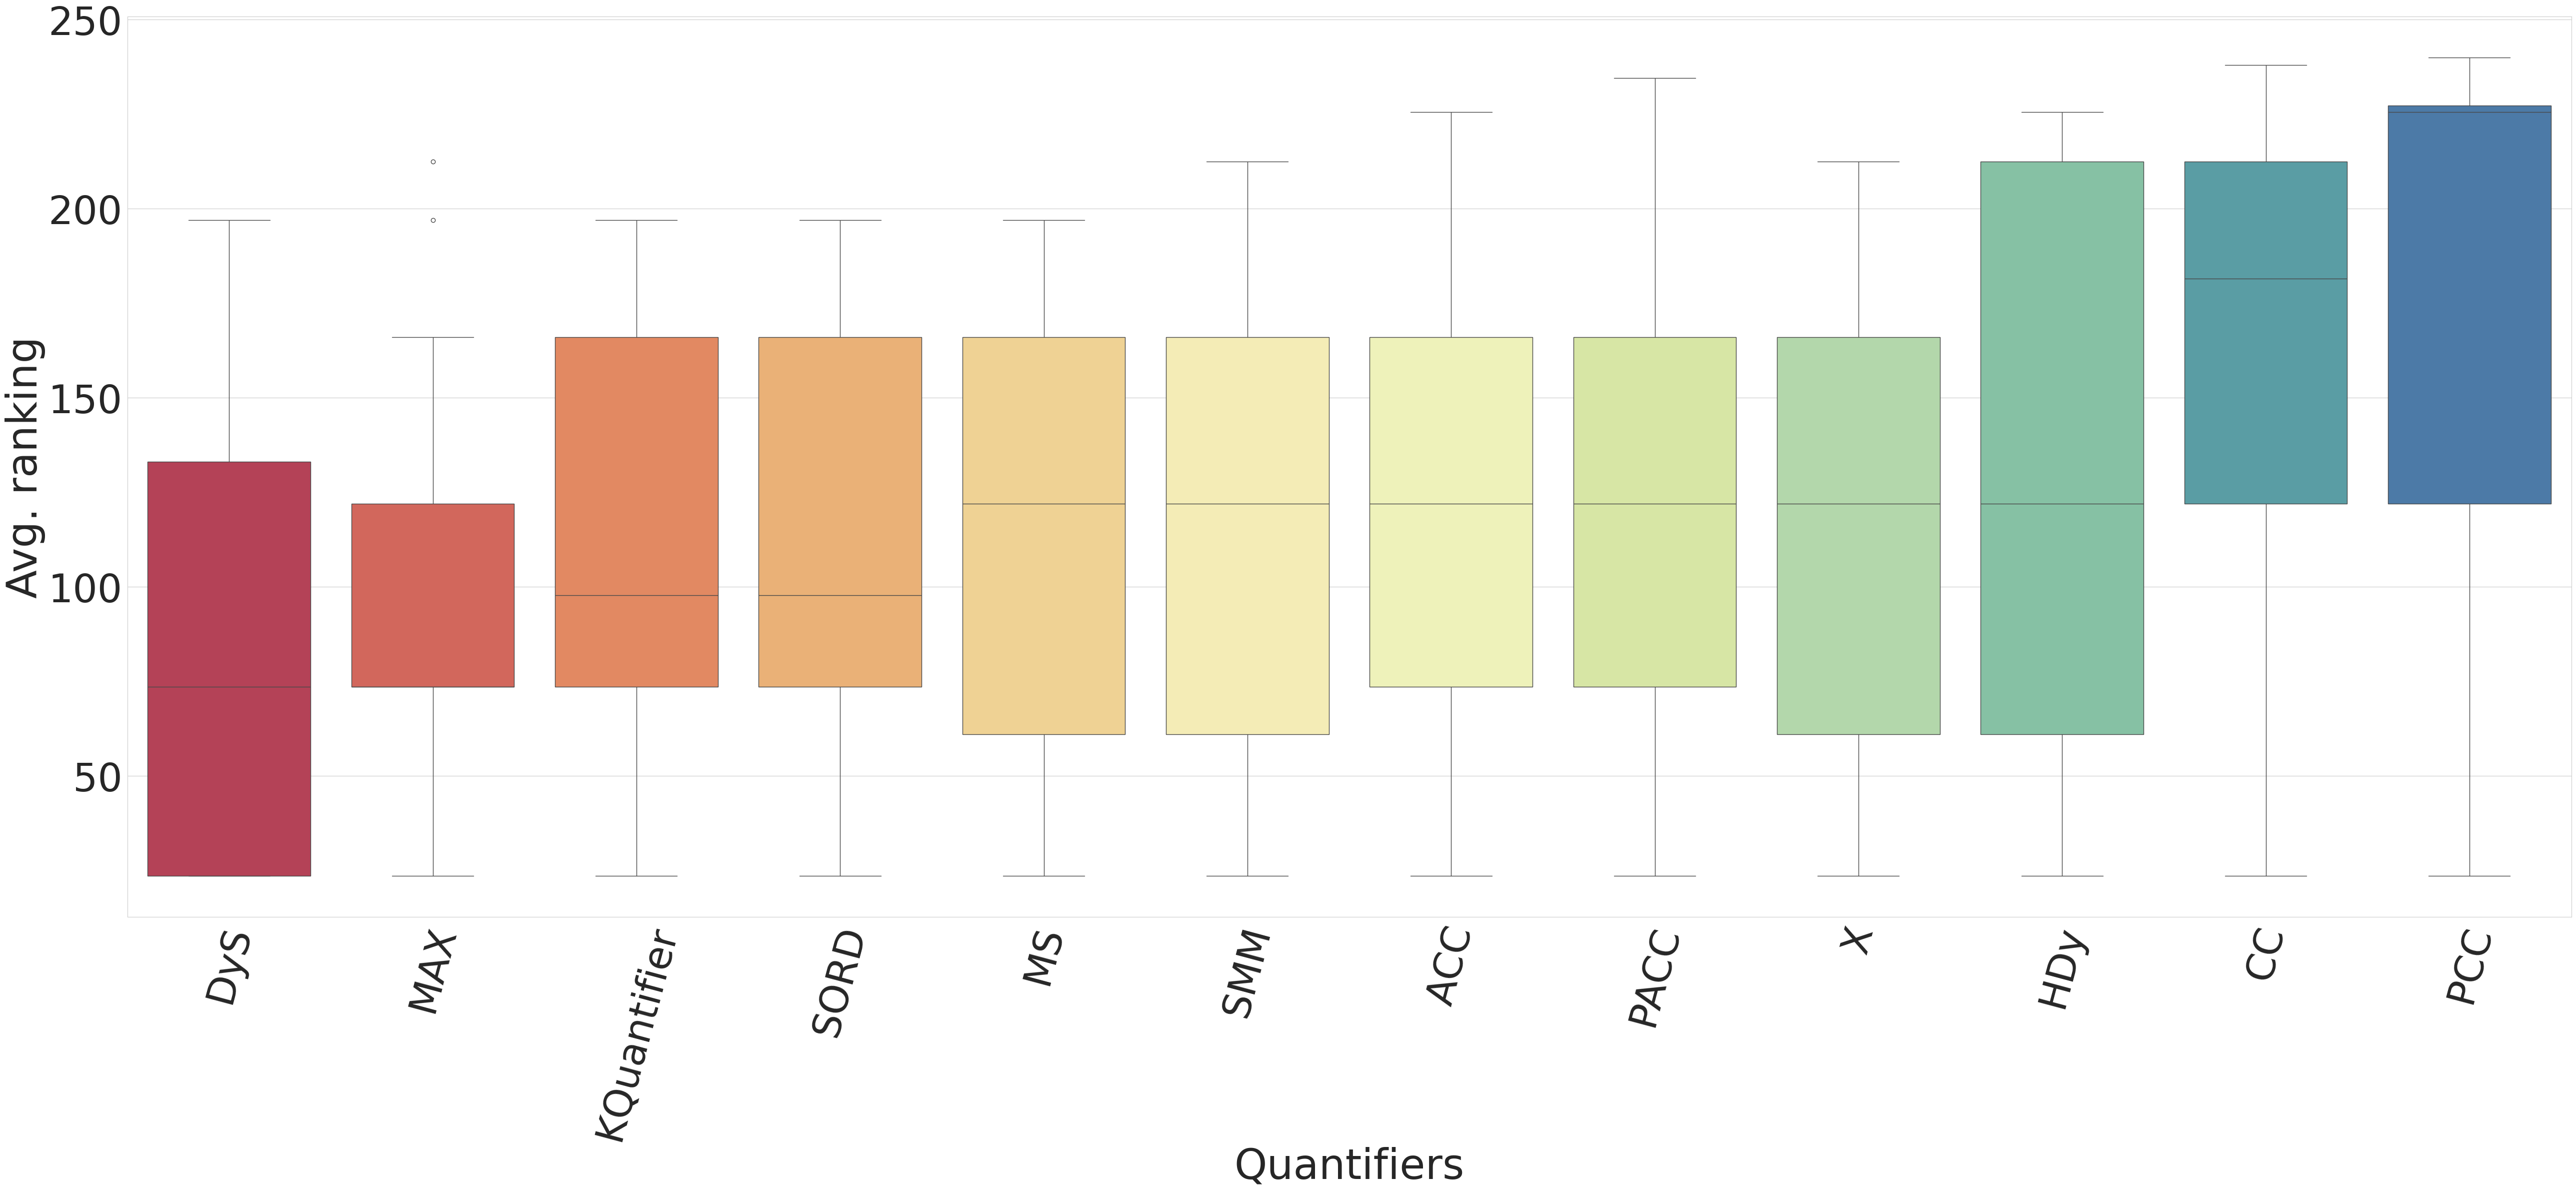

,quantifier,dataset,sample_size,real_prev,pred_prev,abs_error,run_time,error_rank
0,ACC,anuranCalls,100,0.0,0.0,0.00,0.000286,23.5
1,CC,anuranCalls,100,0.0,0.0,0.09,0.000006,236.5
2,DyS,anuranCalls,100,0.0,0.0,0.00,0.044867,23.5
3,HDy,anuranCalls,100,0.0,0.0,0.00,0.202181,23.5
4,MAX,anuranCalls,100,0.0,0.0,0.00,0.000219,23.5
...,...,...,...,...,...,...,...,...
235,PCC,anuranCalls,100,1.0,1.0,0.06,0.002459,225.5
236,SMM,anuranCalls,100,1.0,1.0,0.00,0.000106,23.5
237,SORD,anuranCalls,100,1.0,1.0,0.00,0.354816,23.5
238,X,anuranCalls,100,1.0,1.0,0.00,0.000401,23.5


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

eval_table = pd.read_csv("./evaluation_table.csv")

margin_left = 0.05
margin_right= 0.99
margin_top = 0.99
margin_bottom = .24 # .23
plt_width = 52 # 38
plt_heigth = 24 # 18
plot_rotation = 75
axis_font_size = 56 # 50
labels_size = 60 # 60

def boxplotMae(sample, file=""):
    sample['error_rank'] = sample.groupby(['dataset'], as_index=False )['abs_error'].rank(method='average', ascending = True)

    order = sample.groupby('quantifier')['error_rank'].mean().sort_values().index

    palette = sns.color_palette('Spectral', sample['quantifier'].nunique())

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(plt_width, plt_heigth))
        plt.subplots_adjust(left=margin_left, bottom=margin_bottom, right=margin_right, top=margin_top)
        ax=sns.boxplot(data=sample, x='quantifier', y='error_rank', order = order, palette = palette)

        plt.xticks(rotation =plot_rotation ,fontsize = axis_font_size)
        plt.yticks(fontsize = axis_font_size)

        ax.set_xlabel("Quantifiers",fontsize=labels_size)
        ax.set_ylabel("Avg. ranking",fontsize=labels_size)

    plt.show()
    # if file != "":
    #     ax.figure.savefig('./figs/'+file+ '.pdf', format="pdf", facecolor='w')

    return sample

boxplotMae(eval_table)


Evaluate Quantifier Recommender with Leave-One-Out

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from quantifier_recommender import QuantifierRecommender
from utils_ import load_recommender_evaluation_table

# Fit and evaluate the recommender with leave-one-out strategy
recommender = QuantifierRecommender()
recommender.load_fit_meta_table("./recommender_data/meta_table.h5")
recommender.leave_one_out_evaluation("./plot_data/evaluation_table.csv")

# Load the resulting evaluation table
eval_table = load_recommender_evaluation_table("./plot_data/evaluation_table.csv")
exp_table = pd.read_csv("./plot_data/experiment_table.csv")

margin_left = 0.05
margin_right= 0.99
margin_top = 0.99
margin_bottom = .24 # .23
plt_width = 52 # 38
plt_heigth = 24 # 18
plot_rotation = 75
axis_font_size = 56 # 50
labels_size = 60 # 60

def boxplotMae(sample, file=""):
    sample['error_rank'] = sample.groupby(['dataset'], as_index=False )['abs_error'].rank(method='average', ascending = True)

    order = sample.groupby('quantifier')['error_rank'].mean().sort_values().index

    palette = sns.color_palette('Spectral', sample['quantifier'].nunique())

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(plt_width, plt_heigth))
        plt.subplots_adjust(left=margin_left, bottom=margin_bottom, right=margin_right, top=margin_top)
        ax=sns.boxplot(data=sample, x='quantifier', y='error_rank', order = order, palette = palette)

        plt.xticks(rotation =plot_rotation ,fontsize = axis_font_size)
        plt.yticks(fontsize = axis_font_size)

        ax.set_xlabel("Quantifiers",fontsize=labels_size)
        ax.set_ylabel("Avg. ranking",fontsize=labels_size)

    plt.show()
    # if file != "":
    #     ax.figure.savefig('./figs/'+file+ '.pdf', format="pdf", facecolor='w')

    return sample

def boxplotMae2(sample, file=""):
    sample['error_rank'] = sample.groupby(['Dataset'], as_index=False )['MAE'].rank(method='average', ascending = True)

    order = sample.groupby('Method')['error_rank'].mean().sort_values().index

    palette = sns.color_palette('Spectral', sample['Method'].nunique())

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(plt_width,plt_heigth))
        plt.subplots_adjust(left=margin_left, bottom=margin_bottom, right=margin_right, top=margin_top)
        ax=sns.boxplot(data=sample, x='Method', y='error_rank', order = order, palette = palette)

        plt.xticks(rotation =plot_rotation ,fontsize = axis_font_size)
        plt.yticks(fontsize = axis_font_size)

        ax.set_xlabel("Quantifiers",fontsize=labels_size)
        ax.set_ylabel("Avg. ranking",fontsize=labels_size)

    plt.show()
    if file != "":
        ax.figure.savefig('./figs/'+file+ '.pdf', format="pdf", facecolor='w')

    return sample

# boxplotMae2(exp_table)

In [30]:
exp_table_filtered = exp_table.loc[exp_table['Dataset'] == 'AedesSex']
eval_table_filtered = eval_table.loc[eval_table['dataset'] == 'AedesSex']

eval_qtf = eval_table_filtered['true_ranking'].values[0]
eval_error = eval_table_filtered['true_ranking_error'].values[0]


for quantifier, error in zip(eval_qtf, eval_error):
    filtered_rows = exp_table_filtered.loc[exp_table_filtered['Method'] == quantifier]
    print(quantifier, error, filtered_rows['MAE'].values[0])

DyS 0.0093 0.0105
MS 0.00945 0.0112
SORD 0.00945 0.01115
SMM 0.01045 0.01165
MAX 0.0113 0.01145
ACC 0.0118999999999999 0.0115
X 0.01235 0.01275
HDy 0.01255 0.01365
CC 0.0156 0.0151
PACC 0.02055 0.02095
PCC 0.02745 0.02705


In [29]:
filtered_rows = exp_table_filtered.loc[exp_table_filtered['Method'] == 'DyS']
filtered_rows

,Method,Dataset,MAE
1045,DyS,AedesSex,0.0105


In [31]:
recommender = QuantifierRecommender()
recommender.load_fit_meta_table("./recommender_data/meta_table.h5")

recommender.evaluation_table.to_csv("./plot_data/rec_eval_table.csv")